In [1]:
from astropy import units as u
from astroquery.gaia import Gaia
import matplotlib.pyplot as plt
from astroquery.vizier import Vizier
from astropy.coordinates import SkyCoord
from astropy.coordinates import Angle
import astropy.coordinates as coord
import pandas as pd
import numpy as np
import lightkurve as lk
import ztfquery
from ztfquery import lightcurve
#from ztfquery import fritz

/home/polina/miniforge3/envs/ciao-4.17/lib/python3.11/site-packages/lightkurve/prf/__init__.py:7: UserWarning: Warning: the tpfmodel submodule is not available without oktopus installed, which requires a current version of autograd. See #1452 for details.
  warnings.warn(


In [3]:
#очисттить кэш
Vizier.clear_cache()

In [3]:
vizier = Vizier(columns=['**'])
catalog_list = vizier.query_region(coord.SkyCoord(ra="91.88254348", dec="22.35759401528", unit=(u.deg, u.deg), 
                                            frame='icrs'), radius = Angle(0.001, 'deg'))
catalog_list

TableList with 82 tables:
	'0:I/243/out' with 9 column(s) and 1 row(s) 
	'1:I/252/out' with 9 column(s) and 1 row(s) 
	'2:I/254/out' with 13 column(s) and 1 row(s) 
	'3:I/255/out' with 13 column(s) and 1 row(s) 
	'4:I/271/out' with 21 column(s) and 1 row(s) 
	'5:I/284/out' with 52 column(s) and 1 row(s) 
	'6:I/297/out' with 27 column(s) and 1 row(s) 
	'7:I/304/out' with 18 column(s) and 1 row(s) 
	'8:I/305/out' with 33 column(s) and 1 row(s) 
	'9:I/312/sample' with 29 column(s) and 1 row(s) 
	'10:I/317/sample' with 28 column(s) and 1 row(s) 
	'11:I/319/xpm' with 26 column(s) and 1 row(s) 
	'12:I/322A/out' with 62 column(s) and 1 row(s) 
	'13:I/324/igsl3' with 39 column(s) and 1 row(s) 
	'14:I/327/cmc15' with 18 column(s) and 1 row(s) 
	'15:I/329/urat1' with 45 column(s) and 1 row(s) 
	'16:I/337/gaia' with 58 column(s) and 1 row(s) 
	'17:I/339/hsoy' with 31 column(s) and 1 row(s) 
	'18:I/340/ucac5' with 21 column(s) and 1 row(s) 
	'19:I/342/f3' with 20 column(s) and 1 row(s) 
	'20:I/345

## Lightcurve

In [2]:
search_result= lk.search_lightcurve ('91.882543 +22.35759')
search_result

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 43,2021,QLP,600,45115503,0.0
1,TESS Sector 44,2021,QLP,600,45115503,0.0
2,TESS Sector 71,2023,QLP,200,45115503,0.0
3,TESS Sector 72,2023,QLP,200,45115503,0.0


In [6]:
lc = search_result[1].download() #0- много выбросов, 2 и 3 не очень
lc_data = lc.to_pandas()
lc_data.to_csv('tess_data.csv')
data = pd.read_csv('tess_data.csv')
data

,time,flux,flux_err,cadenceno,sap_flux,kspsap_flux,kspsap_flux_err,quality,orbitid,sap_x,sap_y,sap_bkg,sap_bkg_err,kspsap_flux_sml,kspsap_flux_lag
0,2500.192827,1.018290,0.002908,183273,1.018290,1.000954,0.002908,4096,95,292.43330,381.08575,47340.61,1154.77,1.001036,1.001964
1,2500.199773,1.023138,0.002908,183274,1.023138,1.006222,0.002908,4096,96,292.43207,381.08807,44794.83,1272.79,1.003091,1.006096
2,2500.206718,1.013870,0.002908,183275,1.013870,0.997586,0.002908,4096,0,292.43253,381.09137,42533.36,892.68,0.999235,0.995403
3,2500.213663,1.022694,0.002908,183276,1.022694,1.006731,0.002908,4096,0,292.42984,381.09348,40383.52,1062.71,1.004039,1.009287
4,2500.220608,1.017760,0.002908,183277,1.017760,1.002315,0.002908,4096,0,292.43170,381.09660,38024.48,1000.32,1.001334,1.003037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3256,2524.410166,0.879514,0.002908,186760,0.879514,0.885959,0.002908,4096,0,292.43976,381.35025,-28.64,468.12,0.902649,0.884682
3257,2524.417111,0.836905,0.002908,186761,0.836905,0.843357,0.002908,4096,0,292.44202,381.35630,161.96,538.07,0.868980,0.838366
3258,2524.424056,0.799639,0.002908,186762,0.799639,0.806116,0.002908,6144,0,292.44067,381.35760,2.06,573.77,0.837979,0.799358
3259,2524.431001,0.757915,0.002908,186763,0.757915,0.764356,0.002908,4096,0,292.44125,381.36030,-12.51,611.09,0.804063,0.753515


In [3]:
data = pd.read_csv('tess_data.csv')
data

,time,flux,flux_err,cadenceno,sap_flux,kspsap_flux,kspsap_flux_err,quality,orbitid,sap_x,sap_y,sap_bkg,sap_bkg_err,kspsap_flux_sml,kspsap_flux_lag
0,2500.192827,1.000954,0.002908,183273,1.018290,1.000954,0.002908,4096,95,292.43330,381.08575,47340.61,1154.77,1.001036,1.001964
1,2500.199773,1.006222,0.002908,183274,1.023138,1.006222,0.002908,4096,96,292.43207,381.08807,44794.83,1272.79,1.003091,1.006096
2,2500.206718,0.997586,0.002908,183275,1.013870,0.997586,0.002908,4096,0,292.43253,381.09137,42533.36,892.68,0.999235,0.995403
3,2500.213663,1.006731,0.002908,183276,1.022694,1.006731,0.002908,4096,0,292.42984,381.09348,40383.52,1062.71,1.004039,1.009287
4,2500.220608,1.002315,0.002908,183277,1.017760,1.002315,0.002908,4096,0,292.43170,381.09660,38024.48,1000.32,1.001334,1.003037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3256,2524.410166,0.885959,0.002908,186760,0.879514,0.885959,0.002908,4096,0,292.43976,381.35025,-28.64,468.12,0.902649,0.884682
3257,2524.417111,0.843357,0.002908,186761,0.836905,0.843357,0.002908,4096,0,292.44202,381.35630,161.96,538.07,0.868980,0.838366
3258,2524.424056,0.806116,0.002908,186762,0.799639,0.806116,0.002908,6144,0,292.44067,381.35760,2.06,573.77,0.837979,0.799358
3259,2524.431001,0.764356,0.002908,186763,0.757915,0.764356,0.002908,4096,0,292.44125,381.36030,-12.51,611.09,0.804063,0.753515


In [63]:
data["time"]

0       2500.192827
1       2500.199773
2       2500.206718
3       2500.213663
4       2500.220608
           ...     
3256    2524.410166
3257    2524.417111
3258    2524.424056
3259    2524.431001
3260    2524.437946
Name: time, Length: 3261, dtype: float64

In [69]:
min(data["time"])

2500.1928274643287

In [12]:
df = data.drop(labels=[2504.1098712131393, 2507.9852225704108, 2514.0412923952226, 2514.0482374539038, 2516.985989550943, 2520.73628910007], axis = 1)


KeyError: '[2504.1098712131393, 2507.9852225704108, 2514.0412923952226, 2514.0482374539038, 2516.985989550943, 2520.73628910007] not found in axis'

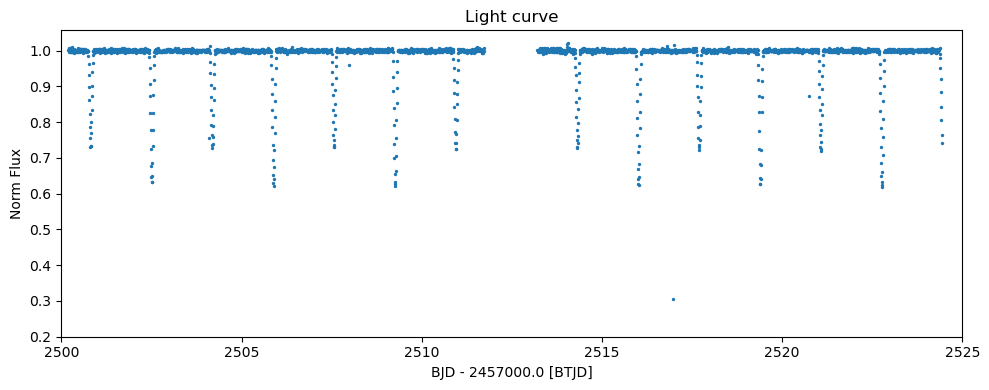

In [4]:
plt.figure(figsize=(10,4))

plt.scatter(data['time'], data['kspsap_flux'], s = 2)
#plt.errorbar(data['time'], data['kspsap_flux'], yerr = data['kspsap_flux_err'], linestyle='none')

plt.xlim(2500, 2525)
plt.yticks(np.arange(0.2, 1.1, 0.1)) 
plt.title("Light curve")
plt.xlabel('BJD - 2457000.0 [BTJD]')
plt.ylabel('Norm Flux')
#plt.grid()
plt.tight_layout()
plt.show()


In [7]:
bad_times = [2504.1098712131393, 2507.9852225704108, 2514.0412923952226, 2514.0482374539038, 2516.985989550943, 2520.73628910007]

mask = ~np.isin(lc.time.value, bad_times) #isin - удаление конкретных значений, isclose - приблизительное соответствие (..., atol = 0.001) atol - точность
lc_new = lc[mask]


In [17]:
len(lc_new.kspsap_flux.value)

3255

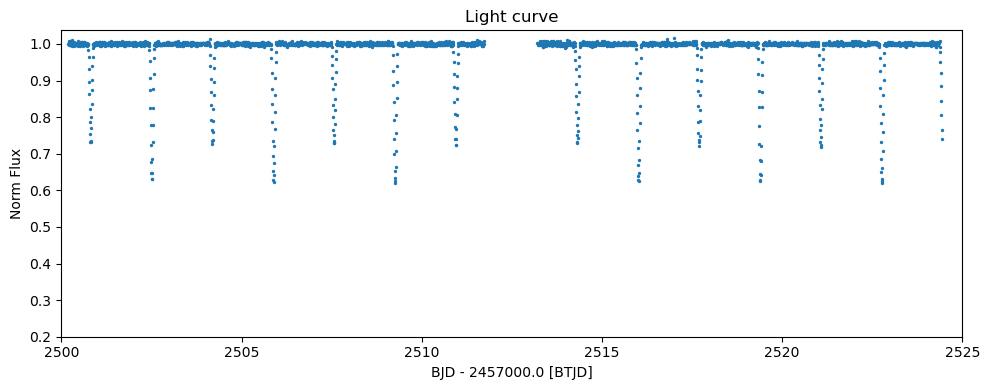

In [19]:
plt.figure(figsize=(10,4))

plt.scatter(lc_new.time.value, lc_new.kspsap_flux.value, s=2)
#plt.errorbar(data['time'], data['kspsap_flux'], yerr = data['kspsap_flux_err'], linestyle='none')

plt.xlim(2500, 2525)
plt.yticks(np.arange(0.2, 1.1, 0.1)) 
plt.title("Light curve")
plt.xlabel('BJD - 2457000.0 [BTJD]')
plt.ylabel('Norm Flux')
#plt.grid()
plt.tight_layout()
plt.show()

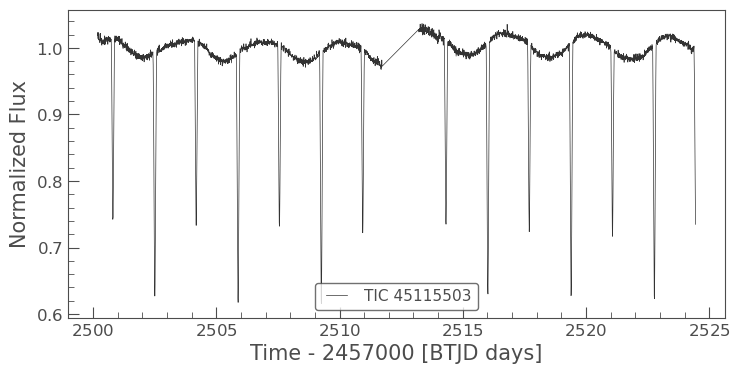

In [10]:
lc_new.plot()
plt.show()

In [27]:
dt = lc_new.time.value[-1] - lc_new.time.value[0]
step = np.median(np.diff(lc_new.time.value))

dt, step, dt/len(lc_new.time.value)

(24.245118181253474, 0.006945039733864178, 0.007448577014209977)

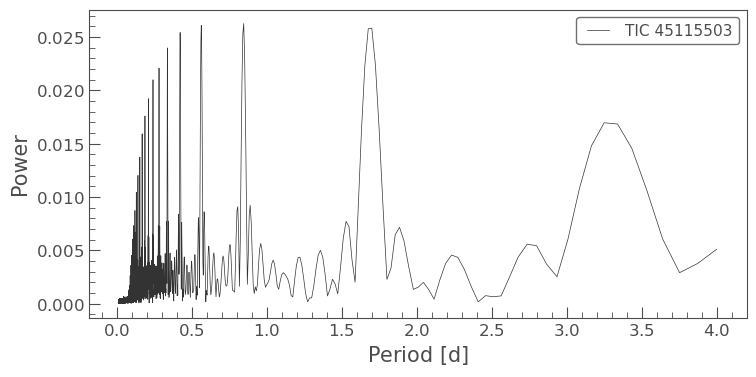

<Quantity 0.8459189 d>

In [44]:
lc_new_pg= lc_new.to_periodogram(method='ls', maximum_period = 4) #all = 0.84613237
lc_new_pg.plot()
plt.show()

lc_new_pg.period_at_max_power

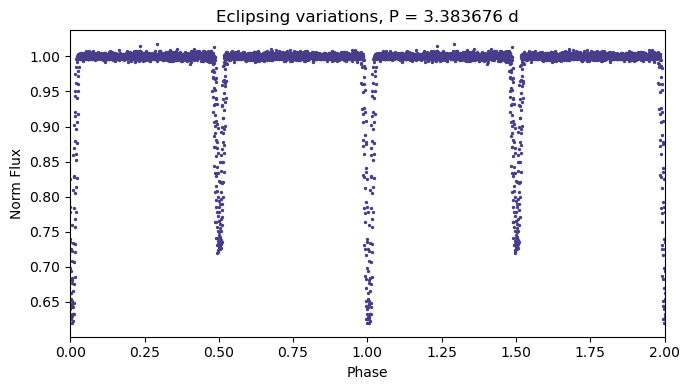

In [38]:
lc_new_phase=lc_new.fold(period=lc_new_pg.period_at_max_power*4, epoch_time=2516.01, epoch_phase=0, normalize_phase = True)
phase = lc_new_phase.phase.value
flux = lc_new_phase.kspsap_flux.value

phase_new = np.concatenate((phase, [x + 1 for x in phase], [x + 2 for x in phase]))
flux_new = np.concatenate((flux, flux, flux))

plt.figure(figsize=(7,4))

plt.scatter(phase_new, flux_new, s=2, color = 'darkslateblue')
#plt.xticks(np.arange(0.2, 1.1, 0.1)) 
plt.xlim(0, 2)
plt.title(f"Eclipsing variations, P = {lc_new_pg.period_at_max_power*4:.6f}")
plt.xlabel('Phase')
plt.ylabel('Norm Flux')
plt.tight_layout()
#plt.text(1.65, 0.65, f"Period = {lc_new_pg.period_at_max_power*2:.6f}")
plt.show()


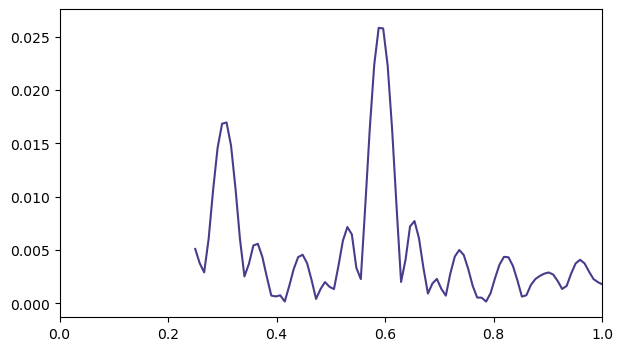

In [40]:
'''
plt.figure(figsize=(7,4))

plt.plot(1/lc_new_pg.period, lc_new_pg.power, color = 'darkslateblue')
plt.xlim(xmin=0, xmax=1)
'''

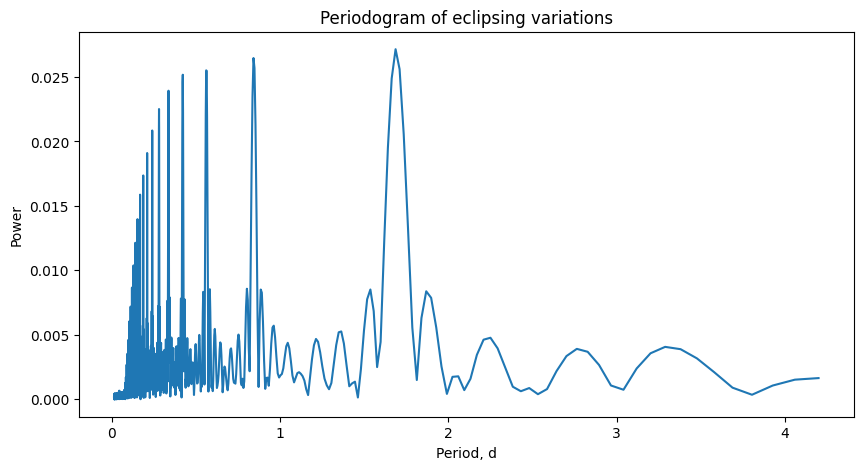

In [52]:
plt.figure(figsize=(10, 5))

'''
for i in range(len(fr_g_em)):
    plt.axvline(x = fr_g_em[i], color = "y", linestyle=':')
'''

'''
plt.axvline(x = frequency_g[np.argmax(power_g)], color = "g", linestyle=':')
plt.axvline(x = frequency_g[np.argmax(power_g)]/2, color = "g", linestyle=':')
plt.axvline(x = frequency_r_add[np.argmax(power_r_add)], color = "r", linestyle=':')
'''

plt.xlabel('Period, d')
plt.ylabel('Power')

plt.plot(lc_new_pg.period, lc_new_pg.power)
plt.title("Periodogram of eclipsing variations")

#plt.xticks(np.arange(0, 0.61, 0.1)) 
plt.show()

In [45]:
lc.hdu[1].header

/tmp/ipykernel_6424/1090846047.py:1: LightkurveDeprecationWarning: The hdu function is deprecated and may be removed in a future version.
        Use fits.open(lc.filename) instead.
  lc.hdu[1].header


XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   56 / length of dimension 1                          
NAXIS2  =                 3278 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                   13 / number of table fields                         
TTYPE1  = 'TIME    '                                                            
TFORM1  = 'D       '                                                            
TUNIT1  = 'BJD-2457000, days'                                                   
TTYPE2  = 'CADENCENO'                                                           
TFORM2  = 'J       '        

## ...

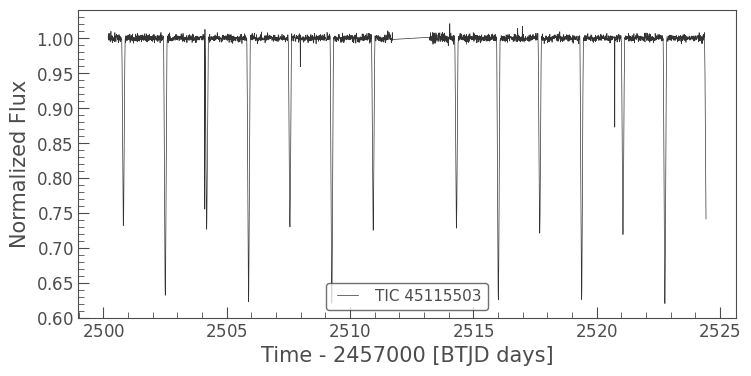

In [165]:
lc_ro=lc.remove_outliers(sigma = 11)
lc_ro.plot()
plt.show()

In [ ]:
lc_time_

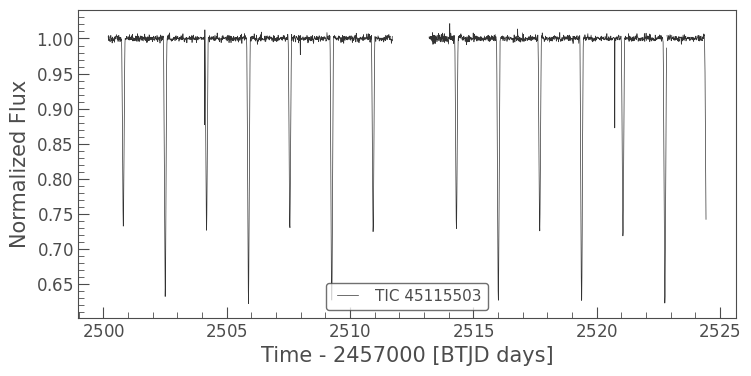

In [166]:
lc_flt=lc_ro.bin(time_bin_size=0.01).flatten(window_length=101)
lc_flt.plot()
plt.show()

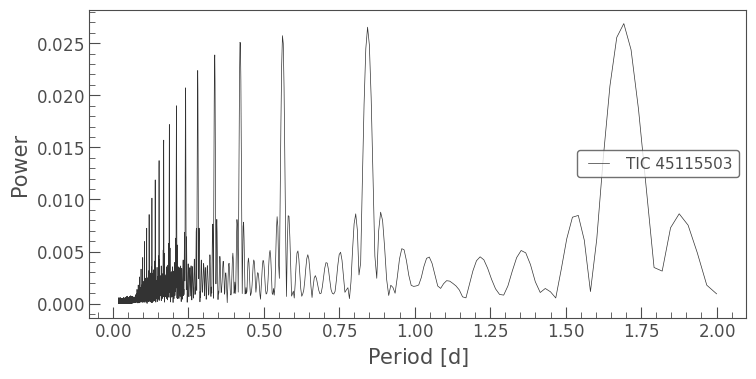

<Quantity 1.69273743 d>

In [176]:
lc_pg= lc_flt.to_periodogram(method='ls', maximum_period = 2)
lc_pg.plot()
plt.show()
lc_pg.period_at_max_power

In [175]:
lc_pg.period_at_max_power*2

<Quantity 1.69273743 d>

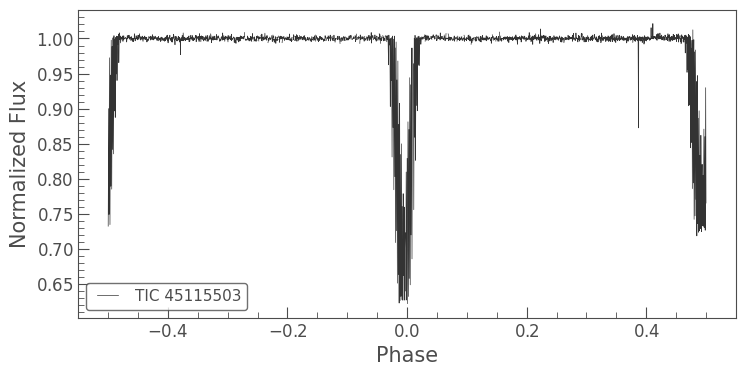

In [178]:
lc_phase=lc_flt.fold(period=lc_pg.period_at_max_power*2, epoch_time=2502.5, epoch_phase=0, normalize_phase = True)
lc_phase.plot()
plt.show()

In [54]:
dt = max(data["time"]) - min(data["time"])
dt

24.245118181253474

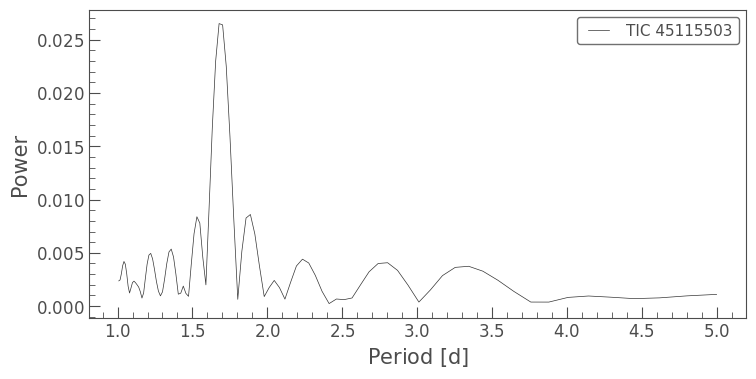

<Quantity 1.67797623 d>

In [69]:
lc_pg= lc.to_periodogram(method='ls', minimum_period = 1, maximum_period = 5)
lc_pg.plot()
plt.show()
lc_pg.period_at_max_power

In [ ]:
lc_phase=lc_flares.fold(period=lc_pg.period_at_max_power, epoch_time=2502.5, epoch_phase=-0.5)
lc_phase.plot()
plt.show()

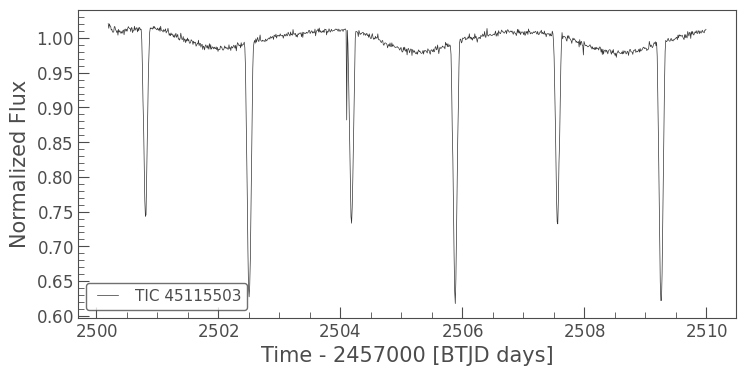

In [73]:
lc_bin=lc.bin(time_bin_size=0.01)
lc_flares=lc_bin.truncate(before=2500, after=2510)
lc_flares.plot()
plt.show()

In [13]:
lc_flares

time,flux,flux_err,time_bin_start,time_bin_size,cadenceno,sap_flux,kspsap_flux,kspsap_flux_err,quality,orbitid,sap_x,sap_y,sap_bkg,sap_bkg_err,kspsap_flux_sml,kspsap_flux_lag
,,,,d,,,,,,,pix,pix,,,,
Time,float64,float64,Time,float64,int32,float32,float32,float32,int32,int32,float64,float64,float32,float32,float32,float32
2500.197827464329,1.0207139253616333,0.0020559614058583975,2500.1928274643287,0.01,183273,1.0207139,1.0035882,0.0029075686,4096,95,292.43267822265625,381.0869140625,46067.72,1213.78,1.0020633,1.00403
2500.2078274643286,1.0138696432113647,0.0029075685888528824,2500.202827464329,0.01,183275,1.0138696,0.99758554,0.0029075686,4096,0,292.4325256347656,381.09136962890625,42533.36,892.68,0.9992347,0.9954026
2500.217827464329,1.0202269554138184,0.0020559614058583975,2500.2128274643287,0.01,183276,1.020227,1.0045233,0.0029075686,4096,0,292.4307861328125,381.09503173828125,39204.0,1031.515,1.0026869,1.0061618
2500.2278274643286,1.0173259973526,0.0029075685888528824,2500.222827464329,0.01,183278,1.017326,1.0023105,0.0029075686,4096,0,292.4342346191406,381.09307861328125,36333.41,1176.46,1.0015595,1.0023805
2500.237827464329,1.0169408321380615,0.0020559614058583975,2500.2328274643287,0.01,183279,1.0169408,1.0025284,0.0029075686,4096,0,292.43231201171875,381.09564208984375,33502.39,1329.165,1.0016716,1.0041864
2500.2478274643286,1.0114730596542358,0.0029075685888528824,2500.242827464329,0.01,183281,1.0114731,0.9976946,0.0029075686,4096,0,292.432373046875,381.1022033691406,31269.09,1034.06,0.99875796,0.99707085
2500.257827464329,1.012447714805603,0.0020559614058583975,2500.2528274643287,0.01,183282,1.0124477,0.9991698,0.0029075686,4096,0,292.43682861328125,381.1004638671875,28774.895,1140.235,1.0005925,0.99934685
2500.2678274643285,1.008612871170044,0.0029075685888528824,2500.262827464329,0.01,183284,1.0086129,0.9958631,0.0029075686,4096,0,292.4396667480469,381.1039123535156,26258.29,1168.7,0.9987966,0.99468017


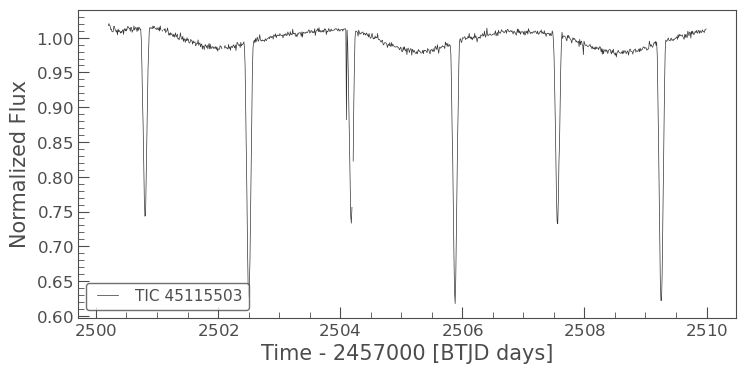

In [14]:
lc_flatten=lc_flares.bin(time_bin_size=0.01) #.bin(time_bin_size=0.01).
lc_flatten.plot()
plt.show()

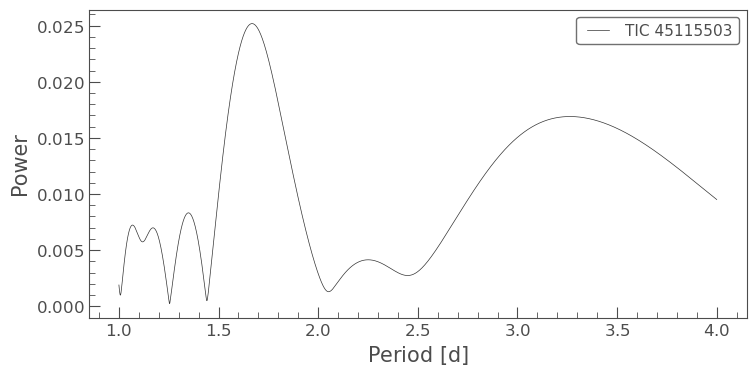

<Quantity 1.66822868 d>

In [15]:
lc_pg= lc_flatten.to_periodogram(method='ls', minimum_period=1, maximum_period=4, oversample_factor=1000)
lc_pg.plot()
plt.show()
lc_pg.period_at_max_power

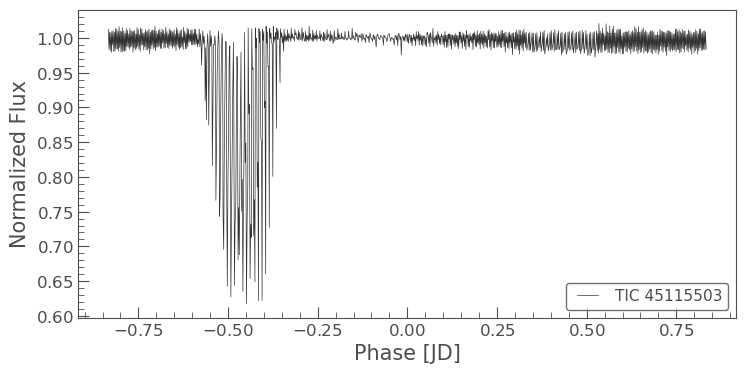

In [16]:
lc_phase=lc_flares.fold(period=lc_pg.period_at_max_power, epoch_time=2502.5, epoch_phase=-0.5)
lc_phase.plot()
plt.show()

In [50]:
lc = lightcurve.LCQuery.from_position(91.8825336,+22.3575916,0.001)
lc.show()